In [1]:
import pandas as pd
#import feature_extraction
import numpy as np

In [ ]:
sampling_rate = '22050'

In [2]:
with open('mfcc_trimmed_'+ sampling_rate + '.npy', 'rb') as f:
    mfcc_trimmed = np.load(f, allow_pickle=True)
    

In [3]:
df_raw = pd.read_csv('RAVDESS_speech.csv')
df_raw.head()

,filePath,emotion,isFemale,actorId
0,data/RAVDESS/Audio_Speech_Actors_01-24/Actor_1...,5,True,16
1,data/RAVDESS/Audio_Speech_Actors_01-24/Actor_1...,6,True,16
2,data/RAVDESS/Audio_Speech_Actors_01-24/Actor_1...,6,True,16
3,data/RAVDESS/Audio_Speech_Actors_01-24/Actor_1...,5,True,16
4,data/RAVDESS/Audio_Speech_Actors_01-24/Actor_1...,7,True,16


In [4]:
df = df_raw
df['mfcc_trimmed_8000'] = mfcc_trimmed
df.head()

,filePath,emotion,isFemale,actorId,mfcc_trimmed_8000
0,data/RAVDESS/Audio_Speech_Actors_01-24/Actor_1...,5,True,16,"[[-754.57117, -694.9109, -314.84448, -186.8011..."
1,data/RAVDESS/Audio_Speech_Actors_01-24/Actor_1...,6,True,16,"[[-466.7767, -304.79755, -246.81868, -242.0063..."
2,data/RAVDESS/Audio_Speech_Actors_01-24/Actor_1...,6,True,16,"[[-552.4616, -555.90173, -577.6375, -587.02057..."
3,data/RAVDESS/Audio_Speech_Actors_01-24/Actor_1...,5,True,16,"[[-614.6107, -605.8241, -603.7317, -616.01843,..."
4,data/RAVDESS/Audio_Speech_Actors_01-24/Actor_1...,7,True,16,"[[-826.5894, -535.8265, -439.99838, -398.53067..."


In [5]:
print(np.shape(df['mfcc_trimmed_8000'][0]))
print(np.mean(df['mfcc_trimmed_8000'][0].T, axis = 0))
print(np.var(df['mfcc_trimmed_8000'][0].T, axis = 0))

(13, 38)
[-363.7653       49.40697     -33.90184      -6.2538486   -35.527245
  -21.23707     -27.77679       0.48013863  -26.280558      1.1619844
  -25.54574       3.678049    -23.333284  ]
[31792.424    1673.0789   2952.8384    612.6995    859.6213    253.71999
   387.93253    92.39307   211.17256    85.97076   146.41557   104.54449
   120.53215]


In [6]:
df['mfcc_8000_mean'] = [ np.mean(x.T, axis = 0) for x in df['mfcc_trimmed_8000']]
df['mfcc_8000_variant'] = [ np.var(x.T, axis = 0) for x in df['mfcc_trimmed_8000']]
df.head()

,filePath,emotion,isFemale,actorId,mfcc_trimmed_8000,mfcc_8000_mean,mfcc_8000_variant
0,data/RAVDESS/Audio_Speech_Actors_01-24/Actor_1...,5,True,16,"[[-754.57117, -694.9109, -314.84448, -186.8011...","[-363.7653, 49.40697, -33.90184, -6.2538486, -...","[31792.424, 1673.0789, 2952.8384, 612.6995, 85..."
1,data/RAVDESS/Audio_Speech_Actors_01-24/Actor_1...,6,True,16,"[[-466.7767, -304.79755, -246.81868, -242.0063...","[-412.21127, 48.816784, -24.687067, 6.343503, ...","[19561.963, 1408.1786, 1485.4745, 425.71057, 7..."
2,data/RAVDESS/Audio_Speech_Actors_01-24/Actor_1...,6,True,16,"[[-552.4616, -555.90173, -577.6375, -587.02057...","[-319.79816, -1.8242835, -35.49867, -1.9946586...","[28143.115, 350.5423, 1844.3494, 516.8374, 107..."
3,data/RAVDESS/Audio_Speech_Actors_01-24/Actor_1...,5,True,16,"[[-614.6107, -605.8241, -603.7317, -616.01843,...","[-286.23312, 38.58663, -24.891806, -11.054575,...","[29499.516, 1457.949, 2011.72, 531.66144, 943...."
4,data/RAVDESS/Audio_Speech_Actors_01-24/Actor_1...,7,True,16,"[[-826.5894, -535.8265, -439.99838, -398.53067...","[-463.25977, 64.4442, -18.76096, 9.644152, -34...","[25839.752, 1569.0743, 1367.6007, 502.87704, 7..."


In [7]:
list_columns_names_mean = [ 'mean_'+str(i)for i in range(0,13)]
list_columns_names_variant = [ 'variant_'+str(i)for i in range(0,13)]

In [8]:
df_mean = pd.DataFrame(df['mfcc_8000_mean'].to_list(), columns=list_columns_names_mean)
display(df_mean.head())
df_variant = pd.DataFrame(df['mfcc_8000_variant'].to_list(), columns=list_columns_names_variant)
df_variant.head()

,mean_0,mean_1,mean_2,mean_3,mean_4,mean_5,mean_6,mean_7,mean_8,mean_9,mean_10,mean_11,mean_12
0,-363.765289,49.406971,-33.901840,-6.253849,-35.527245,-21.237070,-27.776791,0.480139,-26.280558,1.161984,-25.545740,3.678049,-23.333284
1,-412.211273,48.816784,-24.687067,6.343503,-50.678482,-21.998749,-18.322792,-9.440809,-20.366865,3.712731,-24.221680,-0.238318,-15.412035
2,-319.798157,-1.824283,-35.498669,-1.994659,-48.270641,-8.109192,-18.703808,-6.669858,-5.775966,23.469236,-3.374989,24.740158,8.510763
3,-286.233124,38.586632,-24.891806,-11.054575,-34.300022,-10.809740,-23.988708,1.625705,-19.028509,4.945945,-23.948511,-2.812115,-14.908350
4,-463.259766,64.444199,-18.760960,9.644152,-34.848736,-15.106712,-18.047283,0.631559,-15.148623,4.920036,-21.517811,2.411573,-18.305065


,variant_0,variant_1,variant_2,variant_3,variant_4,variant_5,variant_6,variant_7,variant_8,variant_9,variant_10,variant_11,variant_12
0,31792.423828,1673.078857,2952.838379,612.699524,859.621277,253.719986,387.932526,92.393066,211.172562,85.970757,146.415573,104.544487,120.532150
1,19561.962891,1408.178589,1485.474487,425.710571,777.396790,230.865494,610.338806,100.501511,197.366440,148.003662,91.541817,78.109924,95.426826
2,28143.115234,350.542297,1844.349365,516.837402,1072.881592,319.675171,570.591003,150.466904,324.651550,692.735596,364.125397,539.729004,598.261963
3,29499.515625,1457.948975,2011.719971,531.661438,943.760132,235.300751,410.655609,119.481812,153.975189,79.201942,167.248734,76.910416,197.051376
4,25839.751953,1569.074341,1367.600708,502.877045,767.928772,315.755463,303.288849,153.647247,101.415497,83.333870,188.244919,77.793472,151.632187


In [9]:
print(np.shape(df_mean))
print(np.shape(df_variant))
print(np.shape(df))

(1440, 13)
(1440, 13)
(1440, 7)


In [10]:
df_mean

,mean_0,mean_1,mean_2,mean_3,mean_4,mean_5,mean_6,mean_7,mean_8,mean_9,mean_10,mean_11,mean_12
0,-363.765289,49.406971,-33.901840,-6.253849,-35.527245,-21.237070,-27.776791,0.480139,-26.280558,1.161984,-25.545740,3.678049,-23.333284
1,-412.211273,48.816784,-24.687067,6.343503,-50.678482,-21.998749,-18.322792,-9.440809,-20.366865,3.712731,-24.221680,-0.238318,-15.412035
2,-319.798157,-1.824283,-35.498669,-1.994659,-48.270641,-8.109192,-18.703808,-6.669858,-5.775966,23.469236,-3.374989,24.740158,8.510763
3,-286.233124,38.586632,-24.891806,-11.054575,-34.300022,-10.809740,-23.988708,1.625705,-19.028509,4.945945,-23.948511,-2.812115,-14.908350
4,-463.259766,64.444199,-18.760960,9.644152,-34.848736,-15.106712,-18.047283,0.631559,-15.148623,4.920036,-21.517811,2.411573,-18.305065
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,-487.058289,21.009277,-21.434095,10.003755,-31.354811,-3.460346,-19.106592,-0.142435,-19.306221,7.228897,-10.254415,4.132202,-4.700964
1436,-600.498535,40.394386,-1.545241,18.779417,-16.522629,4.637306,-10.300756,8.352492,-12.478089,9.656779,-8.229940,2.904972,-3.484350
1437,-673.326538,67.635750,8.528842,23.359594,-6.426037,6.085814,-13.193465,8.117932,-14.451356,9.468757,-9.184512,4.244012,0.516651
1438,-668.777466,70.797546,12.326674,22.544489,-5.018249,-0.987450,-7.465687,5.825398,-9.729234,8.919762,-9.389228,4.639522,-0.673263


In [11]:
df_variant

,variant_0,variant_1,variant_2,variant_3,variant_4,variant_5,variant_6,variant_7,variant_8,variant_9,variant_10,variant_11,variant_12
0,31792.423828,1673.078857,2952.838379,612.699524,859.621277,253.719986,387.932526,92.393066,211.172562,85.970757,146.415573,104.544487,120.532150
1,19561.962891,1408.178589,1485.474487,425.710571,777.396790,230.865494,610.338806,100.501511,197.366440,148.003662,91.541817,78.109924,95.426826
2,28143.115234,350.542297,1844.349365,516.837402,1072.881592,319.675171,570.591003,150.466904,324.651550,692.735596,364.125397,539.729004,598.261963
3,29499.515625,1457.948975,2011.719971,531.661438,943.760132,235.300751,410.655609,119.481812,153.975189,79.201942,167.248734,76.910416,197.051376
4,25839.751953,1569.074341,1367.600708,502.877045,767.928772,315.755463,303.288849,153.647247,101.415497,83.333870,188.244919,77.793472,151.632187
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,30838.242188,525.222168,1278.611206,193.068390,1129.886230,248.248047,810.345337,144.997986,382.255341,132.602173,287.960938,104.706757,195.757462
1436,46220.054688,334.656433,1931.541992,94.984650,1297.062012,160.421951,614.938049,62.576904,540.547119,20.055172,295.361298,82.207779,187.649124
1437,33867.738281,669.529663,1358.264282,229.598953,791.790710,133.579788,569.783447,74.615601,460.544556,32.352547,243.649353,80.420090,172.853577
1438,36047.007812,803.890686,1424.870728,282.061737,784.901733,327.360413,651.476440,98.865715,407.872467,38.147083,321.734436,47.386208,156.069962


In [12]:
df

,filePath,emotion,isFemale,actorId,mfcc_trimmed_8000,mfcc_8000_mean,mfcc_8000_variant
0,data/RAVDESS/Audio_Speech_Actors_01-24/Actor_1...,5,True,16,"[[-754.57117, -694.9109, -314.84448, -186.8011...","[-363.7653, 49.40697, -33.90184, -6.2538486, -...","[31792.424, 1673.0789, 2952.8384, 612.6995, 85..."
1,data/RAVDESS/Audio_Speech_Actors_01-24/Actor_1...,6,True,16,"[[-466.7767, -304.79755, -246.81868, -242.0063...","[-412.21127, 48.816784, -24.687067, 6.343503, ...","[19561.963, 1408.1786, 1485.4745, 425.71057, 7..."
2,data/RAVDESS/Audio_Speech_Actors_01-24/Actor_1...,6,True,16,"[[-552.4616, -555.90173, -577.6375, -587.02057...","[-319.79816, -1.8242835, -35.49867, -1.9946586...","[28143.115, 350.5423, 1844.3494, 516.8374, 107..."
3,data/RAVDESS/Audio_Speech_Actors_01-24/Actor_1...,5,True,16,"[[-614.6107, -605.8241, -603.7317, -616.01843,...","[-286.23312, 38.58663, -24.891806, -11.054575,...","[29499.516, 1457.949, 2011.72, 531.66144, 943...."
4,data/RAVDESS/Audio_Speech_Actors_01-24/Actor_1...,7,True,16,"[[-826.5894, -535.8265, -439.99838, -398.53067...","[-463.25977, 64.4442, -18.76096, 9.644152, -34...","[25839.752, 1569.0743, 1367.6007, 502.87704, 7..."
...,...,...,...,...,...,...,...
1435,data/RAVDESS/Audio_Speech_Actors_01-24/Actor_0...,3,True,8,"[[-708.2912, -708.1683, -708.55, -709.35815, -...","[-487.0583, 21.009277, -21.434095, 10.003755, ...","[30838.242, 525.22217, 1278.6112, 193.06839, 1..."
1436,data/RAVDESS/Audio_Speech_Actors_01-24/Actor_0...,3,True,8,"[[-811.72095, -812.30927, -816.89453, -820.352...","[-600.49854, 40.394386, -1.5452408, 18.779417,...","[46220.055, 334.65643, 1931.542, 94.98465, 129..."
1437,data/RAVDESS/Audio_Speech_Actors_01-24/Actor_0...,2,True,8,"[[-885.5575, -878.3623, -867.48346, -871.7266,...","[-673.32654, 67.63575, 8.528842, 23.359594, -6...","[33867.74, 669.52966, 1358.2643, 229.59895, 79..."
1438,data/RAVDESS/Audio_Speech_Actors_01-24/Actor_0...,2,True,8,"[[-863.99805, -863.7721, -864.4971, -868.35645...","[-668.77747, 70.79755, 12.3266735, 22.544489, ...","[36047.008, 803.8907, 1424.8707, 282.06174, 78..."


In [13]:
df = pd.concat([df, df_mean, df_variant], axis=1)

In [14]:
df = df.drop(labels= ['filePath','isFemale','actorId', 'mfcc_8000_mean','mfcc_trimmed_8000', 'mfcc_8000_variant'], axis=1)

In [15]:
df

,emotion,mean_0,mean_1,mean_2,mean_3,mean_4,mean_5,mean_6,mean_7,mean_8,...,variant_3,variant_4,variant_5,variant_6,variant_7,variant_8,variant_9,variant_10,variant_11,variant_12
0,5,-363.765289,49.406971,-33.901840,-6.253849,-35.527245,-21.237070,-27.776791,0.480139,-26.280558,...,612.699524,859.621277,253.719986,387.932526,92.393066,211.172562,85.970757,146.415573,104.544487,120.532150
1,6,-412.211273,48.816784,-24.687067,6.343503,-50.678482,-21.998749,-18.322792,-9.440809,-20.366865,...,425.710571,777.396790,230.865494,610.338806,100.501511,197.366440,148.003662,91.541817,78.109924,95.426826
2,6,-319.798157,-1.824283,-35.498669,-1.994659,-48.270641,-8.109192,-18.703808,-6.669858,-5.775966,...,516.837402,1072.881592,319.675171,570.591003,150.466904,324.651550,692.735596,364.125397,539.729004,598.261963
3,5,-286.233124,38.586632,-24.891806,-11.054575,-34.300022,-10.809740,-23.988708,1.625705,-19.028509,...,531.661438,943.760132,235.300751,410.655609,119.481812,153.975189,79.201942,167.248734,76.910416,197.051376
4,7,-463.259766,64.444199,-18.760960,9.644152,-34.848736,-15.106712,-18.047283,0.631559,-15.148623,...,502.877045,767.928772,315.755463,303.288849,153.647247,101.415497,83.333870,188.244919,77.793472,151.632187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,3,-487.058289,21.009277,-21.434095,10.003755,-31.354811,-3.460346,-19.106592,-0.142435,-19.306221,...,193.068390,1129.886230,248.248047,810.345337,144.997986,382.255341,132.602173,287.960938,104.706757,195.757462
1436,3,-600.498535,40.394386,-1.545241,18.779417,-16.522629,4.637306,-10.300756,8.352492,-12.478089,...,94.984650,1297.062012,160.421951,614.938049,62.576904,540.547119,20.055172,295.361298,82.207779,187.649124
1437,2,-673.326538,67.635750,8.528842,23.359594,-6.426037,6.085814,-13.193465,8.117932,-14.451356,...,229.598953,791.790710,133.579788,569.783447,74.615601,460.544556,32.352547,243.649353,80.420090,172.853577
1438,2,-668.777466,70.797546,12.326674,22.544489,-5.018249,-0.987450,-7.465687,5.825398,-9.729234,...,282.061737,784.901733,327.360413,651.476440,98.865715,407.872467,38.147083,321.734436,47.386208,156.069962


In [16]:
# https://reader.elsevier.com/reader/sd/pii/S1877705811022570?token=926C80EF15253895366664CA5FD00CA8FD577E6C420B2F308A2B47E6BEF0AAE4CD7EDF5D49CA4AAADBE9BB4A89974597&originRegion=eu-west-1&originCreation=20211119224359
# https://www-ai.cs.tu-dortmund.de/EVENTS/FGML2001/FGML2001-Paper-Rueping.pdf


In [19]:
y = df['emotion']-1

In [20]:
y

0       4
1       5
2       5
3       4
4       6
       ..
1435    2
1436    2
1437    1
1438    1
1439    0
Name: emotion, Length: 1440, dtype: int64

In [21]:
X = df.drop(labels=['emotion'], axis=1)

In [22]:
X

,mean_0,mean_1,mean_2,mean_3,mean_4,mean_5,mean_6,mean_7,mean_8,mean_9,...,variant_3,variant_4,variant_5,variant_6,variant_7,variant_8,variant_9,variant_10,variant_11,variant_12
0,-363.765289,49.406971,-33.901840,-6.253849,-35.527245,-21.237070,-27.776791,0.480139,-26.280558,1.161984,...,612.699524,859.621277,253.719986,387.932526,92.393066,211.172562,85.970757,146.415573,104.544487,120.532150
1,-412.211273,48.816784,-24.687067,6.343503,-50.678482,-21.998749,-18.322792,-9.440809,-20.366865,3.712731,...,425.710571,777.396790,230.865494,610.338806,100.501511,197.366440,148.003662,91.541817,78.109924,95.426826
2,-319.798157,-1.824283,-35.498669,-1.994659,-48.270641,-8.109192,-18.703808,-6.669858,-5.775966,23.469236,...,516.837402,1072.881592,319.675171,570.591003,150.466904,324.651550,692.735596,364.125397,539.729004,598.261963
3,-286.233124,38.586632,-24.891806,-11.054575,-34.300022,-10.809740,-23.988708,1.625705,-19.028509,4.945945,...,531.661438,943.760132,235.300751,410.655609,119.481812,153.975189,79.201942,167.248734,76.910416,197.051376
4,-463.259766,64.444199,-18.760960,9.644152,-34.848736,-15.106712,-18.047283,0.631559,-15.148623,4.920036,...,502.877045,767.928772,315.755463,303.288849,153.647247,101.415497,83.333870,188.244919,77.793472,151.632187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,-487.058289,21.009277,-21.434095,10.003755,-31.354811,-3.460346,-19.106592,-0.142435,-19.306221,7.228897,...,193.068390,1129.886230,248.248047,810.345337,144.997986,382.255341,132.602173,287.960938,104.706757,195.757462
1436,-600.498535,40.394386,-1.545241,18.779417,-16.522629,4.637306,-10.300756,8.352492,-12.478089,9.656779,...,94.984650,1297.062012,160.421951,614.938049,62.576904,540.547119,20.055172,295.361298,82.207779,187.649124
1437,-673.326538,67.635750,8.528842,23.359594,-6.426037,6.085814,-13.193465,8.117932,-14.451356,9.468757,...,229.598953,791.790710,133.579788,569.783447,74.615601,460.544556,32.352547,243.649353,80.420090,172.853577
1438,-668.777466,70.797546,12.326674,22.544489,-5.018249,-0.987450,-7.465687,5.825398,-9.729234,8.919762,...,282.061737,784.901733,327.360413,651.476440,98.865715,407.872467,38.147083,321.734436,47.386208,156.069962


Begin the training model:

In [25]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf', class_weight='balanced')

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state=0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [26]:
svm.fit(X_train, y_train)

SVC(class_weight='balanced')

In [27]:
svm.score(X_test, y_test)

0.5416666666666666

In [28]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10, 50],
              'gamma': [0.0001, 0.0005, 0.001, 0.005]}

grid = GridSearchCV(svm, param_grid, verbose=2, n_jobs=-1)
grid

GridSearchCV(estimator=SVC(class_weight='balanced'), n_jobs=-1,
             param_grid={'C': [1, 5, 10, 50],
                         'gamma': [0.0001, 0.0005, 0.001, 0.005]},
             verbose=2)

In [29]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(estimator=SVC(class_weight='balanced'), n_jobs=-1,
             param_grid={'C': [1, 5, 10, 50],
                         'gamma': [0.0001, 0.0005, 0.001, 0.005]},
             verbose=2)

In [30]:
print(grid.best_params_)

{'C': 50, 'gamma': 0.005}


In [31]:
model = grid.best_estimator_
model.score(X_test, y_test)

0.5555555555555556

In [38]:
import pickle
filename = 'svm_' + sampling_rate + '.sav'
pickle.dump(model, open(filename, 'wb'))

<AxesSubplot:>

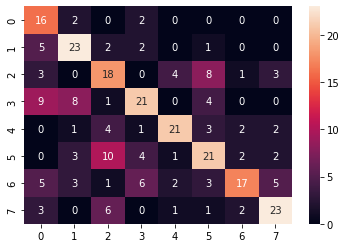

In [33]:
import seaborn as sns 
from sklearn.metrics import confusion_matrix
y_pred = grid.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")

In [36]:
from sklearn.metrics import classification_report
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.39      0.80      0.52        20
           1       0.57      0.70      0.63        33
           2       0.43      0.49      0.46        37
           3       0.58      0.49      0.53        43
           4       0.72      0.62      0.67        34
           5       0.51      0.49      0.50        43
           6       0.71      0.40      0.52        42
           7       0.66      0.64      0.65        36

    accuracy                           0.56       288
   macro avg       0.57      0.58      0.56       288
weighted avg       0.58      0.56      0.56       288

